In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.integrate import odeint

# Debugging
I wrote some very smart and complex piece of code. 

However, it does not work as expected and I can't see the mistake --> **A BUG**

## Liang and Chow perceptual bistability

In [2]:
def heavyside(x): 
    return 1 if x>0 else 0

def laing_chow(y, t, I1, I2): 
    """Implements eqs (1-4) from laing and chow in the format required by scipy.integrate.odeint. 
        y is assumed to be a list [u1, a1, u2, a2]
    """
    # set parameter by default
    alpha, beta = 0.2, 0.4
    g1 = g2 = 1
    phi, tau = 0.4, 20
    
    # get values from input vector 
    u1, a1, u2, a2 = y
    
    # update equations as in the paper 
    u1dot = -u1 + heavyside(alpha * g1 * u1 - beta * g2 * u2 - a1 + I1)
    u2dot = -u2 + heavyside(alpha * g2 * u2 - beta * g1 * u1 - a2 + I2)
    a1dot = 1 / tau * (-a1 + phi * heavyside(alpha * g1 * u1 - beta * g2 * u2 - a1 + I1))
    a2dot = 1 / tau * (-a2 + phi * heavyside(alpha * g2 * u2 - beta * g1 * u1 - a2 + I2))    
    
    # return in vector format (as a list)
    return [u1dot, a1dot, u2dot, a2dot]

In [3]:
def plot_results(sol, t): 
    # get the solution and reproduce the figure in the paper 
    u1, a1, u2, a2 = sol.T
    
    plt.figure(figsize=(18, 8))
    plt.suptitle("Solution for the reduced model (1) through (4)", fontsize=16)
    
    plt.subplot(111)
    plt.plot(t, u1, 'b')
    plt.plot(t, a1, 'g')
    plt.ylim((-.2, 1.2))
    plt.plot(t, u2, 'r')
    plt.plot(t, a2, 'y')
    plt.ylim((-.2, 1.2))
    plt.legend([r"$u_1$", r"$a_1$", r"$u_2$", r"$a_2$"], fontsize=15)
    plt.xlabel("Time", fontsize=15); 

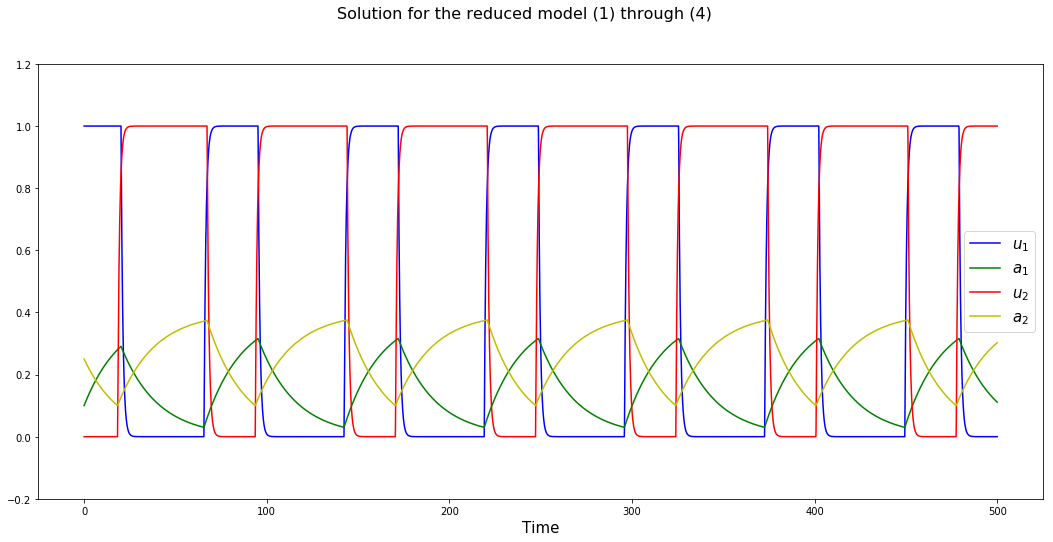

In [4]:
x0 = [1, 0.1, 0, 0.25]
I1, I2 = 0.43, 0.5
t = np.linspace(0,500,5001)
sol = odeint(laing_chow, x0, t, args=(I1, I2))
plot_results(sol, t) 

# Calculate the dominance durations

In [7]:
def dominance_durations(x1, x2, t): 
    """Calculates the dominant durations of x1 over x2"""
    
    # get the dominance arrays: logical array
    dom = (x1 - x2) > .1
    
#     import pdb; pdb.set_trace()
    # find the shifts by taking the derivative
    idx = np.where(np.diff(dom))[0]
    
    # add shifts at the beginning and end to compensate the diff operation
    shifttimes = np.zeros(len(idx) + 2)
    shifttimes[-1] = max(t)
    
    # add the shift times into the array
    shifttimes[1:-1] = t[idx]
    
    # who dominated first? 
    x1start = 0 if x1[0] > x2[0] else 1
    
    return np.diff(shifttimes)[x1start::2]

In [8]:
dominance_durations(sol[:,2], sol[:,0], t)

array([46.9, 48.5, 48.5, 48.6, 48.5, 48.5, 20.7])

## PyCharm Debugging Demo